# Multilayer Perceptron (MLP) for MNIST 

In [26]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

# Data Preparation

In [27]:
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

target_directory = "mnist"

mnist_real_train = MNIST(target_directory, train=True, download=True, transform=transforms.ToTensor())
mnist_test = MNIST(target_directory, train=False, download=True, transform=transforms.ToTensor())

In [28]:
mnist_train, mnist_validation = data.random_split(mnist_real_train, (48000, 12000))
len(mnist_train), len(mnist_validation)

(48000, 12000)

In [29]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

# Implementation of LeNet-5 in PyTorch using MNIST dataset

In [ ]:
def compute_acc(logits, y):
    return (logits.argmax(dim=1) == y).float().mean()

layers = [
    nn.Conv2d(1, 6, 5, stride=1, padding=2),
    nn.Tanh(),
    nn.AvgPool2d(2, stride=2),
    nn.Tanh(),
    nn.Conv2d(6, 16, 5, stride=1, padding=0),
    nn.Tanh(),
    nn.AvgPool2d(2, stride=2),
    nn.Tanh(),
    nn.Conv2d(16, 120, 5, stride=1, padding=0),
    nn.Tanh(),
    nn.Flatten(),
    nn.Linear(120, 84),
    nn.Tanh(),
    nn.Linear(84, 10)
]


model = nn.Sequential(*layers)

cost = torch.nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters())


train_loss = []
validation_acc = []
best_model = None
best_acc = None
best_epoch = None
max_epoch = 10000
no_improvement = 5
batch_size = 512

for n_epoch in range(max_epoch):
    model.train()
    loader = data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=1)
    epoch_loss = []
    for X_batch, y_batch in loader:
        opt.zero_grad()
        logits = model(X_batch)
        loss = cost(logits, y_batch)
        loss.backward()
        opt.step()        
        epoch_loss.append(loss.detach())
    train_loss.append(torch.tensor(epoch_loss).mean())
    model.eval()
    loader = data.DataLoader(mnist_validation, batch_size=len(mnist_validation), shuffle=False)
    X, y = next(iter(loader))
    logits = model(X)
    acc = compute_acc(logits, y).detach()
    validation_acc.append(acc)
    if best_acc is None or acc > best_acc:
        print("New best epoch ", n_epoch, "acc", acc)
        best_acc = acc
        best_model = model.state_dict()
        best_epoch = n_epoch
    if best_epoch + no_improvement <= n_epoch:
        print("No improvement for", no_improvement, "epochs")
        break
        
model.load_state_dict(best_model)

New best epoch  0 acc tensor(0.9012)
New best epoch  1 acc tensor(0.9338)
New best epoch  2 acc tensor(0.9531)
New best epoch  3 acc tensor(0.9632)
New best epoch  4 acc tensor(0.9698)
New best epoch  5 acc tensor(0.9740)
New best epoch  6 acc tensor(0.9763)
New best epoch  7 acc tensor(0.9778)
New best epoch  8 acc tensor(0.9797)
New best epoch  9 acc tensor(0.9818)
New best epoch  10 acc tensor(0.9818)
New best epoch  11 acc tensor(0.9837)
New best epoch  13 acc tensor(0.9851)
New best epoch  18 acc tensor(0.9860)
New best epoch  20 acc tensor(0.9862)
New best epoch  24 acc tensor(0.9883)
No improvement for 5 epochs


<All keys matched successfully>

In [24]:
loader = data.DataLoader(mnist_test, batch_size=len(mnist_test), shuffle=False)
X, y = next(iter(loader))
logits = model(X)
acc = compute_acc(logits, y).detach()
print("Test accuracy", acc)
loader = data.DataLoader(mnist_validation, batch_size=1, shuffle=True)
X, y = next(iter(loader))
logits = model(X)
acc = compute_acc(logits, y).detach()
print("Validation accuracy", acc)


Test accuracy tensor(0.9864)
Validation accuracy tensor(1.)


torch.Size([136])


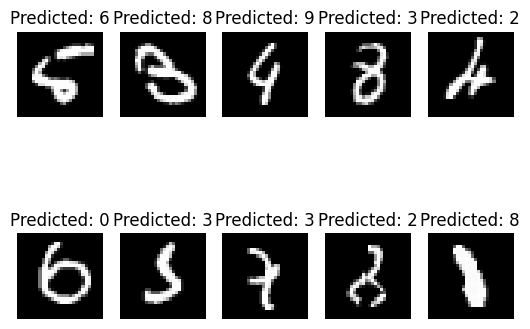

In [25]:
loader = data.DataLoader(mnist_test, batch_size=len(mnist_test), shuffle=False)
X, y = next(iter(loader))
logits = model(X)
pred = logits.argmax(dim=1)
bad = (pred != y)
bad_idx = bad.nonzero().squeeze()
print(bad_idx.shape)
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[bad_idx[i]][0], cmap='gray')
    plt.title("Predicted: {}".format(pred[bad_idx[i]]))
    plt.axis('off')
